In [1]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
    

In [2]:
# read data 
data = pd.read_csv('Quote.csv')

In [18]:
data.head()

,tacgia,Link,NamSinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."


In [32]:
# check data is null  
data.isna().sum()

tacgia     0
Link       0
NamSinh    0
Quote      0
dtype: int64

In [33]:
tagia_stas = data['tacgia'].value_counts()
tagia_stas.head(5)

Albert Einstein    10
J.K. Rowling        9
Marilyn Monroe      7
Dr. Seuss           6
Mark Twain          6
Name: tacgia, dtype: int64

Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

In [34]:
df = pd.DataFrame(data=data, columns=['tacgia', 'Quote'])
# Append column containing length of quotes
df["Length_quote"] = df['Quote'].apply(lambda x: len(x))
df

,tacgia,Quote,Length_quote
0,Albert Einstein,“The world as we have created it is a process ...,115
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",85
2,Albert Einstein,“There are only two ways to live your life. On...,131
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",104
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",111
...,...,...,...
95,Harper Lee,“You never really understand a person until yo...,148
96,Madeleine L'Engle,“You have to write the book that wants to be w...,139
97,Mark Twain,“Never tell the truth to people who are not wo...,58
98,Dr. Seuss,"“A person's a person, no matter how small.”",43


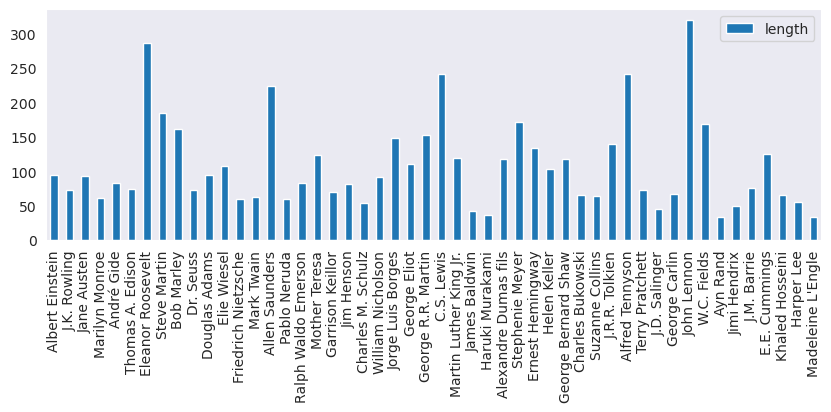

In [36]:
sns.set_style("dark")
group = df.groupby('tacgia').mean().to_numpy().tolist()
test = df['tacgia'].drop_duplicates().values.tolist()

plotdata = pd.DataFrame(
    {"length": [group[i][0]for i in range(len(group))]}, 
    index=test)
plotdata.plot(kind="bar")
plt.rcParams["figure.figsize"] = (10,3)

Thống kê về năm sinh và độ tuổi của các tác giả,

In [37]:
data_tuoi = pd.read_csv('Quote_add_Tuoi.csv')
df = pd.DataFrame(data=data_tuoi, columns=['NamSinh', 'Tuoi'])  

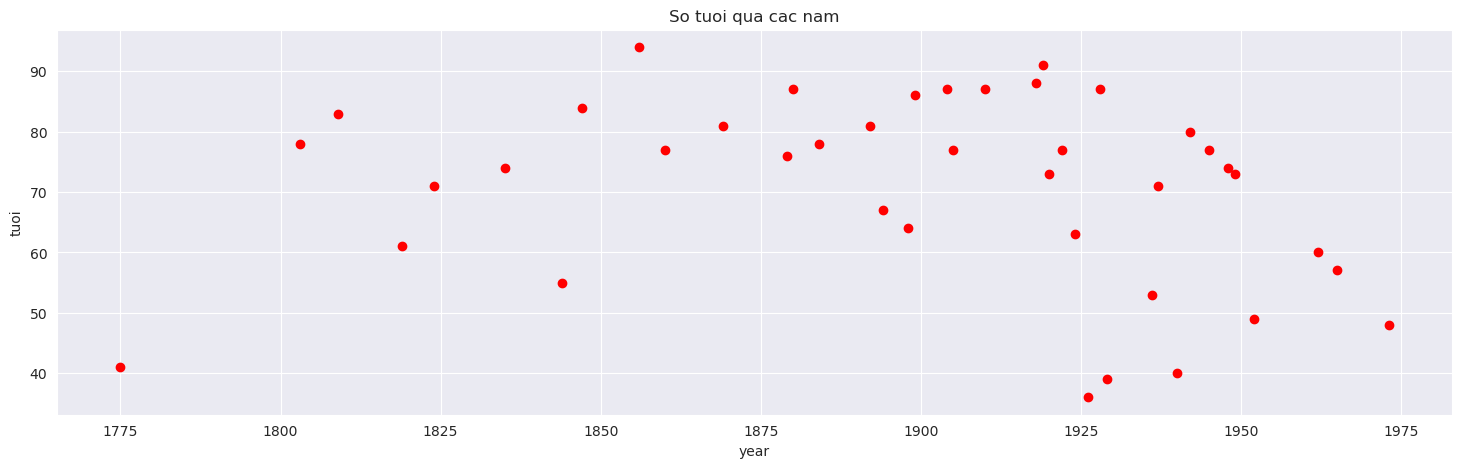

In [38]:
df['year'] = pd.DatetimeIndex(df['NamSinh']).year
df_sample_grouped = df.groupby(['year']).size()
year = df[['year']].drop_duplicates()
tuoi = [df[df['year'] == i[0]].drop_duplicates().values.tolist()[0][1]
        for i in year.values]

# plot chart

f, ax = plt.subplots(figsize=(18,5)) 
plt.title("So tuoi qua cac nam")
plt.plot(year.values, tuoi, 'ro')
plt.xlabel("year")
plt.ylabel("tuoi")
plt.grid()
plt.rcParams["figure.figsize"] = (10,3)
plt.show()


Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, ...

In [68]:
df = data
df["Length_quote"] = df['Quote'].apply(lambda x: len(x))
df["Length_quote"].describe()

count     100.000000
mean      122.270000
std       133.747376
min        34.000000
25%        66.500000
50%        86.000000
75%       125.000000
max      1084.000000
Name: Length_quote, dtype: float64

In [69]:
tacgia_quote_length = df.groupby('tacgia').sum().to_numpy().tolist()
name_of_authors = df['tacgia'].drop_duplicates().values.tolist()
df = pd.DataFrame({"tacgia":name_of_authors,"val": [tacgia_quote_length[i][0] for i in range(len(name_of_authors))]}) 
df.head()

,tacgia,val
0,Albert Einstein,937
1,J.K. Rowling,72
2,Jane Austen,93
3,Marilyn Monroe,61
4,André Gide,82


Text(0.5, 1.0, 'Top câu dài nhất')

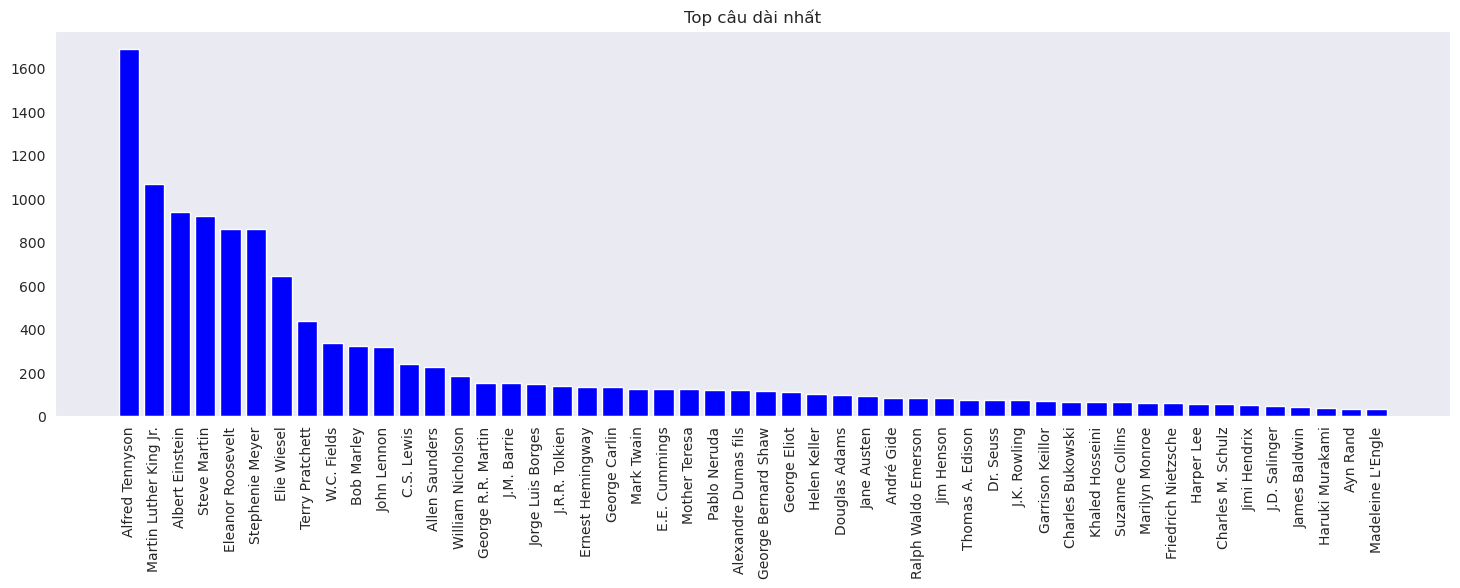

In [70]:
f, ax = plt.subplots(figsize=(18,5)) 
df = df.sort_values(by='val', ascending=False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(df['tacgia'].values,df['val'].values ,color='blue')
plt.title('Top câu dài nhất')

Thống kê về các từ được sử dụng trong các câu nói

In [71]:
words_counts = {}
for comments in data['Quote'].tolist():
    for word in comments.split():
        if word not in words_counts:
            words_counts[word] = 1
        words_counts[word] += 1
        
DICT_SIZE = 10000
POPULAR_WORDS = sorted(words_counts, key=words_counts.get, reverse=True)[:DICT_SIZE]

POPULAR_WORDS[:10]

['you', 'to', 'is', 'a', 'the', 'of', 'and', 'I', 'not', 'be']

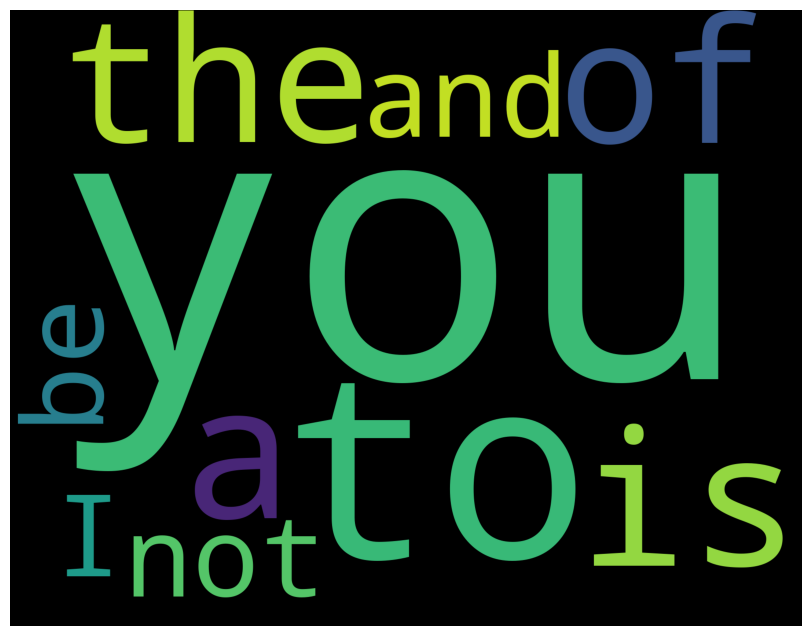

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
unique_string=  Counter(POPULAR_WORDS[:10])
wordcloud = WordCloud(width=1800, height=1400).generate_from_frequencies(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("top_10_words"+".png", bbox_inches='tight')
plt.show()
plt.close()

(-0.5, 1799.5, 1399.5, -0.5)

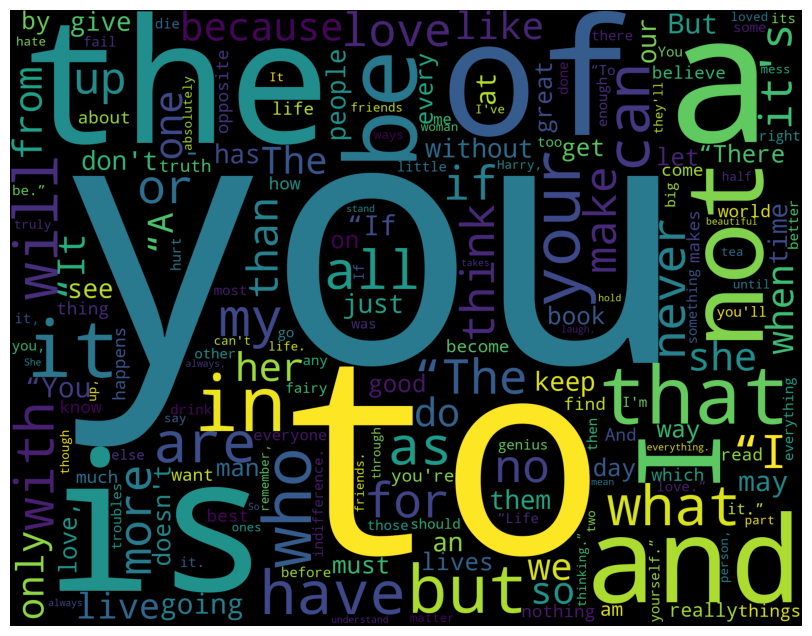

In [63]:
# All words 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=1800, height=1400).generate_from_frequencies(words_counts)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

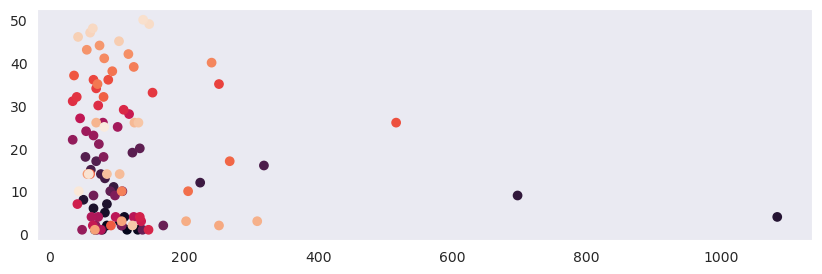

In [98]:
df = data
df["Length_quote"] = df['Quote'].apply(lambda x: len(x))
df['code'] = pd.factorize(df['tacgia'])[0] + 1

# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
data1 =  np.array(df['Length_quote'].values)
data2 =  np.array(df['code'].values)

count = 0
newArray = np.array([])
for i in range(len(data1)):
    newArray = np.append (newArray, [count])
    count += 10




pyplot.scatter(data1, data2, c=newArray)
pyplot.show()

In [123]:
df['year'] = pd.DatetimeIndex(df['NamSinh']).year
df_sample_grouped = df.groupby(['year']).size()
year = df[['year']].drop_duplicates()
tuoi = [df[df['year'] == i[0]].drop_duplicates().values.tolist()[0][1]
        for i in year.values]

df

,tacgia,Link,NamSinh,Quote,Tuoi,year
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,76,1879
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",57,1965
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,76,1879
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",41,1775
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36,1926
...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,89,1926
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,1918-11-29,“You have to write the book that wants to be w...,88,1918
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,74,1835
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87,1904


In [ ]:
#sns.catplot(data=df, x="NamSinh", y="tacgia", jitter=False)
ax = sns.catplot(data=df, x="tacgia", y="Tuoi",hue='year', kind="swarm")
ax.fig.set_figwidth(20.27)
ax.fig.set_figheight(11.7)
ax.set_xticklabels(rotation=90)

   # Dự đoán tên của người nổi tiếng theo câu nói

In [3]:
data.drop(['Link','NamSinh'], axis = 1, inplace = True)

In [4]:
data

,tacgia,Quote
0,Albert Einstein,“The world as we have created it is a process ...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,“There are only two ways to live your life. On...
3,Jane Austen,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and..."
...,...,...
95,Harper Lee,“You never really understand a person until yo...
96,Madeleine L'Engle,“You have to write the book that wants to be w...
97,Mark Twain,“Never tell the truth to people who are not wo...
98,Dr. Seuss,"“A person's a person, no matter how small.”"


In [5]:
data["length"] = data["Quote"].apply(len)

In [6]:
# test
data[data["length"] == 115]["Quote"].iloc[0]

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [7]:
# Remove data value only exist once 
df = data[data.groupby('tacgia').tacgia.transform(len) > 1]
df.reset_index(drop=True, inplace=True)
df

,tacgia,Quote,length
0,Albert Einstein,“The world as we have created it is a process ...,115
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",85
2,Albert Einstein,“There are only two ways to live your life. On...,131
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",104
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",111
...,...,...,...
60,C.S. Lewis,“I believe in Christianity as I believe that t...,132
61,J.K. Rowling,"“The truth."" Dumbledore sighed. ""It is a beaut...",123
62,Mark Twain,“Never tell the truth to people who are not wo...,58
63,Dr. Seuss,"“A person's a person, no matter how small.”",43


TF-IDF


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['id'] = df['tacgia'].factorize()[0]


tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df.Quote).toarray()
labels = df.id
features.shape
# each of 65 Quotes is represented by 536 features, 

/tmp/ipykernel_40060/4086151150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df['tacgia'].factorize()[0]


(65, 536)

Multi-Class Classifier

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Quote'], df['tacgia'], random_state = 0)

In [19]:
from sklearn.naive_bayes import MultinomialNB
X_train_tfidf = tfidf.fit_transform(X_train) 
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# test
print(clf.predict(tfidf.transform(["It is impossible to live without failing at something"])))

['J.K. Rowling']


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  #print(model_name, accuracies)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
  
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

/home/harry/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/harry/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/harry/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/harry/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


model_name
LinearSVC                 0.229437
LogisticRegression        0.261905
MultinomialNB             0.199856
RandomForestClassifier    0.137085
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with Logistic having a slight advantage

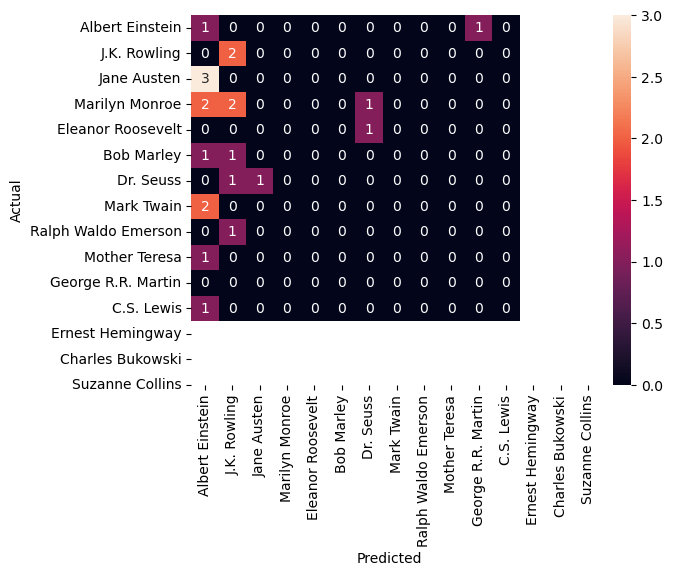

In [205]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.tacgia.values, yticklabels=category_id_df.tacgia.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Độ tương đồng


In [1]:


# the code  which will do the normalized TF calculation
def termFrequency(term, document):
    normalizeDocument = document.lower().split()
    return normalizeDocument.count(term.lower()) / float(len(normalizeDocument))

In [14]:

from sklearn.metrics.pairwise import cosine_similarity

corpus = data['Quote'].tolist()
vect = TfidfVectorizer(min_df=1, stop_words="english")
#vect = TfidfVectorizer()
tfidf = vect.fit_transform(corpus)

pairwise_similarity = tfidf * tfidf.T
#pairwise_similarity = cosine_similarity(tfidf, tfidf)


In [23]:
data.head()

,tacgia,Link,NamSinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“the world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“it is our choices, harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“there are only two ways to live your life. on...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“the person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“imperfection is beauty, madness is genius and..."


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


data['Quote'] = data['Quote'].str.lower()
corpus = data['Quote'].tolist()
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
corpus2 = tfidf_vectorizer.fit_transform(corpus)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)

df_tfidf = pd.DataFrame(corpus2.toarray(), columns=tfidf_vectorizer.get_feature_names()) 




from sklearn.metrics.pairwise import cosine_similarity

dj=pd.DataFrame(cosine_similarity(df_tfidf, dense_output=True))

dj.head()

/home/harry/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.129663,0.0,0.0,...,0.0,0.150359,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.083392,0.0,0.0,0.245878,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.142349,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.117324,0.000000,0.0,0.0,0.000000,0.0


In [5]:

# Create list of lists:
#  [(row number,index position,similarity value)]

def create_lists(dj):
    list_of_lists =[]
    for row_number ,similarity_value in enumerate(dj.values):
        for index_postion in range(len(similarity_value)):
            # [(row number,index position,similarity value)]
            list_of_lists.append([row_number,index_postion,similarity_value[index_postion]])
    # When the index and row number are same then we have 1 
    # Because, the matrix are corresponding to same quote 
    # make it equal to 0 so we can find the max value for each row.
    for i in range(len(list_of_lists)):
         if list_of_lists[i][0]==list_of_lists[i][1]:
                list_of_lists[i][2] = 0 
    return list_of_lists

list_of_lists =  create_lists(dj) 


list_of_lists

[[0, 0, 0],
 [0, 1, 0.0],
 [0, 2, 0.0],
 [0, 3, 0.0],
 [0, 4, 0.0],
 [0, 5, 0.0],
 [0, 6, 0.0],
 [0, 7, 0.0],
 [0, 8, 0.0],
 [0, 9, 0.0],
 [0, 10, 0.0222358029888818],
 [0, 11, 0.0],
 [0, 12, 0.0],
 [0, 13, 0.08281064072226159],
 [0, 14, 0.0],
 [0, 15, 0.0],
 [0, 16, 0.0],
 [0, 17, 0.0],
 [0, 18, 0.0],
 [0, 19, 0.0],
 [0, 20, 0.0],
 [0, 21, 0.0],
 [0, 22, 0.0],
 [0, 23, 0.0],
 [0, 24, 0.0],
 [0, 25, 0.0],
 [0, 26, 0.0],
 [0, 27, 0.0],
 [0, 28, 0.0],
 [0, 29, 0.0],
 [0, 30, 0.0],
 [0, 31, 0.0],
 [0, 32, 0.0],
 [0, 33, 0.0],
 [0, 34, 0.0],
 [0, 35, 0.0],
 [0, 36, 0.0],
 [0, 37, 0.0],
 [0, 38, 0.0],
 [0, 39, 0.0],
 [0, 40, 0.0],
 [0, 41, 0.0],
 [0, 42, 0.0],
 [0, 43, 0.0],
 [0, 44, 0.0],
 [0, 45, 0.0],
 [0, 46, 0.0],
 [0, 47, 0.0],
 [0, 48, 0.0],
 [0, 49, 0.0],
 [0, 50, 0.0],
 [0, 51, 0.0],
 [0, 52, 0.0716258925060086],
 [0, 53, 0.0],
 [0, 54, 0.30005286644829565],
 [0, 55, 0.0],
 [0, 56, 0.0],
 [0, 57, 0.0],
 [0, 58, 0.0],
 [0, 59, 0.0],
 [0, 60, 0.0],
 [0, 61, 0.0],
 [0, 62, 0.0],
 [0, 

In [14]:
from collections import defaultdict

# use the lists of lists from above and create a dictionary list 
#This will match all of our values back to a dataframe format but, with the updated zero values.
def update_df(list_of_lists):
    dict_list =defaultdict(list)    
    for i in range(len(list_of_lists)):
        dict_list[list_of_lists[i][0]].append(list_of_lists[i][2])
    # updated zero values
    updated_df=pd.DataFrame(dict_list)
    position_maxVal=[] 
    for i in range(len(updated_df)):
        position_maxVal.append(np.argmax(updated_df[i]))
    
    return updated_df, position_maxVal 

updated_df, position_maxVal  = update_df(list_of_lists)


# ---
sent_comp=[] 
# list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
for i in position_maxVal:
    sent_comp.append(corpus[i])

# tweets based on highest similarity value per row as DF
similar_quotes_=pd.DataFrame(sent_comp,columns=['Similar quote'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

similar_quotes_


,Similar quote
0,“if you only read the books that everyone else...
1,“some people never go crazy. what truly horrib...
2,“life isn't about finding yourself. life is ab...
3,"“a person's a person, no matter how small.”"
4,“the difference between genius and stupidity i...
...,...
95,“any fool can know. the point is to understand.”
96,“there is no friend as loyal as a book.”
97,"“if you judge people, you have no time to love..."
98,“you don’t forget the face of the person who w...


In [ ]:
# another ways 

In [170]:
vect = TfidfVectorizer(min_df=1, stop_words="english")
tfidf = vect.fit_transform(corpus) 
arr = pairwise_similarity.toarray()
np.fill_diagonal(arr, np.nan)

res = []
for i in corpus: 
    input_idx = corpus.index(i)
    result_idx = np.nanargmax(arr[input_idx]) 
    res.append(corpus[result_idx])
    
df = pd.DataFrame({'tacgia ':corpus,'similar quotes':res})
df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).hide(axis='index')

tacgia,similar quotes
“the world as we have created it is a process of our thinking. it cannot be changed without changing our thinking.”,"“if you only read the books that everyone else is reading, you can only think what everyone else is thinking.”"
"“it is our choices, harry, that show what we truly are, far more than our abilities.”",“some people never go crazy. what truly horrible lives they must lead.”
“there are only two ways to live your life. one is as though nothing is a miracle. the other is as though everything is a miracle.”,“life isn't about finding yourself. life is about creating yourself.”
"“the person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”","“a person's a person, no matter how small.”"
"“imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",“the difference between genius and stupidity is: genius has its limits.”
“try not to become a man of success. rather become a man of value.”,“the real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.”
“it is better to be hated for what you are than to be loved for what you are not.”,“but better to get hurt by the truth than comforted with a lie.”
"“i have not failed. i've just found 10,000 ways that won't work.”",“there are only two ways to live your life. one is as though nothing is a miracle. the other is as though everything is a miracle.”
“a woman is like a tea bag; you never know how strong it is until it's in hot water.”,"“a day without sunshine is like, you know, night.”"
"“a day without sunshine is like, you know, night.”",“we read to know we're not alone.”
